# Produce 10 different models for committee vote

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator
import os

import sklearn
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers

import copy

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from scipy import stats

from module1 import *

# Write a function to redefine committe vote

In [221]:
def committe_vote(p, **kwargs):
    '''
    redefine a new committe vote modality
    '''
    con = []
    for key, value in kwargs.items():
        value = np.expand_dims(value, 0)
        con.append(value)
    new = np.concatenate(con, axis = 0)
    num_test = new.shape[1]
    num_model = new.shape[0]
    num_class = new.shape[2]
    pred = np.empty(shape=num_test)

    for i in range(num_test):
        ma = new[:, i, :]
        vote = np.empty(num_model)
        ind_pro = {0: [], 1: [],2: [],3: [],4: [],5: [],6: [],7: [],8: [],9: []}
        for j in np.arange(num_model):
            vote[j] = np.argmax(ma[j, :])
            ind_pro.get(vote[j]).append(np.amax(ma[j, :]))
        m, n = stats.mode(vote, axis=None)
        if n >= num_model * p:
            pred[i] = m
        else:
            ind_new = {}
            for key, value in ind_pro.items():
                if value != []:
                    ind_new[key] = value
            ind_mean = {}
            ind_num = {}
            for key, value in ind_new.items():
                ind_mean[key] = np.mean(value)
                ind_num[key] = len(value)
            ind_final = {}
            for key in ind_new:
                ind_final[key] = ind_mean[key] * ind_num[key] / num_model
            need = max(ind_final.values())
            for key, value in ind_final.items():
                if value == need:
                    pred[i] = key
    return pred

In [204]:
a1 = np.random.rand(10000,10)
a2 = np.random.rand(10000,10)
a3 = np.random.rand(10000,10)
committe_vote(0.7, model1 = a1, model2 = a2, model3 = a3)

array([8., 0., 7., ..., 4., 4., 2.])

# Test this new committe vote modality

In [309]:
# the data, split between train and test sets
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255
#X_train = X_train.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)

In [310]:
X_com = X_train[:600, :, :, :]
y_com = y_train[:600]

In [311]:
model, history = CNNfit(X_com, y_com)
y1 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y2 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y3 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y4 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y5 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y6 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y7 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y8 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y9 = model.predict(x_test, verbose = 1)
model, history = CNNfit(X_com, y_com)
y10 = model.predict(x_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step


In [320]:
P = 0.7
Nerr1 = 0
for i in range(len(y_test)):
    v1 = np.argmax(y1[i])
    v2 = np.argmax(y2[i])
    v3 = np.argmax(y3[i])
    v4 = np.argmax(y4[i])
    v5 = np.argmax(y5[i])
    v6 = np.argmax(y6[i])
    v7 = np.argmax(y7[i])
    v8 = np.argmax(y8[i])
    v9 = np.argmax(y9[i])
    v10 = np.argmax(y10[i])
    vote = np.median([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10])
    if int(vote) != int(y_test[i]):
        Nerr1 += 1

PEG1 = Nerr1/len(y_test)
print(Nerr1)
print('Committee of %d votes gives PEG= %.4f' % (10,PEG1*100)) 


re = committe_vote(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
Nerr2 = 0
for i in range(len(y_test)):
    if int(re[i]) != int(y_test[i]):
        Nerr2 += 1

PEG2 = Nerr2/len(y_test)
print(Nerr2)
print('Committee of %d votes gives PEG= %.4f' % (10,PEG2*100)) 

re = expectation_vote(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
Nerr3 = 0
for i in range(len(y_test)):
    if int(re[i]) != int(y_test[i]):
        Nerr3 += 1

PEG3 = Nerr3/len(y_test)
print(Nerr3)
print('Committee of %d votes gives PEG= %.4f' % (10,PEG3*100)) 

re = expectation_vote2(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
Nerr4 = 0
for i in range(len(y_test)):
    if int(re[i]) != int(y_test[i]):
        Nerr4 += 1

PEG4 = Nerr4/len(y_test)
print(Nerr4)
print('Committee of %d votes gives PEG= %.4f' % (10,PEG4*100))


print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG2*100, Nerr1 - Nerr2))
print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG3*100, Nerr1 - Nerr3))
print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG4*100, Nerr1 - Nerr4))

2200
Committee of 10 votes gives PEG= 22.0000
2122
Committee of 10 votes gives PEG= 21.2200
2363
Committee of 10 votes gives PEG= 23.6300
2382
Committee of 10 votes gives PEG= 23.8200

The improvance is 0.780000 and 78 more rights.

The improvance is -1.630000 and -163 more rights.

The improvance is -1.820000 and -182 more rights.


# Use expectation of committe vote weighted by frequency to make final decisions

In [301]:
def expectation_vote2(p, **kwargs):
    '''
    redefine a new committe vote modality
    '''
    con = []
    for key, value in kwargs.items():
        value = np.expand_dims(value, 0)
        con.append(value)
    new = np.concatenate(con, axis = 0)
    num_test = new.shape[1]
    num_model = new.shape[0]
    num_class = new.shape[2]
    pred = np.empty(shape=num_test)

    for i in range(num_test):
        ma = new[:, i, :]
        vote = np.empty(num_model)
        #ind_pro = {0: [], 1: [],2: [],3: [],4: [],5: [],6: [],7: [],8: [],9: []}
        for j in np.arange(num_model):
            vote[j] = np.argmax(ma[j, :])
            #ind_pro.get(vote[j]).append(np.amax(ma[j, :]))
        m, n = stats.mode(vote, axis=None)
        if n >= num_model * p:
            pred[i] = m
        else:
            unique, counts = np.unique(vote, return_counts=True)
            orind = np.argsort(counts)
            max_two = orind[-2:]
            max_uni = unique[max_two]
            max_count = counts[max_two]
            max_pro = np.divide(max_count, np.sum(max_count))
            pred[i] = np.rint(np.sum(np.multiply(max_uni, max_pro)))
    return pred

In [295]:
def expectation_vote(p, **kwargs):
    '''
    redefine a new committe vote modality
    '''
    con = []
    for key, value in kwargs.items():
        value = np.expand_dims(value, 0)
        con.append(value)
    new = np.concatenate(con, axis = 0)
    num_test = new.shape[1]
    num_model = new.shape[0]
    num_class = new.shape[2]
    pred = np.empty(shape=num_test)

    for i in range(num_test):
        ma = new[:, i, :]
        vote = np.empty(num_model)
        ind_pro = {0: [], 1: [],2: [],3: [],4: [],5: [],6: [],7: [],8: [],9: []}
        for j in np.arange(num_model):
            vote[j] = np.argmax(ma[j, :])
            ind_pro.get(vote[j]).append(np.amax(ma[j, :]))
        m, n = stats.mode(vote, axis=None)
        if n >= num_model * p:
            pred[i] = m
        else:
            unique, counts = np.unique(vote, return_counts=True)
            pro = np.divide(counts, num_model)
            pred[i] = np.rint(np.sum(np.multiply(unique, pro)))
    return pred

# Compare original committe vote with improved one

313/313 [==============================] - 1s 2ms/step


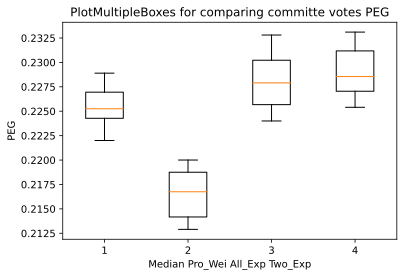

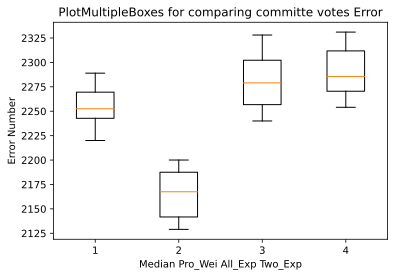

In [326]:
def Compare_committe_vote(P = 0.7, Nrestart = 10):
    """
    Use Nrestarts to compare different committe votes
    """
    boxes = []
    PEG_median = np.empty((Nrestart))
    PEG_pro_wei = np.empty((Nrestart))
    PEG_all_exp = np.empty((Nrestart))
    PEG_two_exp = np.empty((Nrestart))

    boxes2 = []
    PEG_median2 = np.empty((Nrestart))
    PEG_pro_wei2 = np.empty((Nrestart))
    PEG_all_exp2 = np.empty((Nrestart))
    PEG_two_exp2 = np.empty((Nrestart))
    for i in np.arange(Nrestart):
        # the data, split between train and test sets
        (X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

        # Scale images to the [0, 1] range
        x_test = x_test.astype("float32") / 255
        #X_train = X_train.astype("float32") / 255
        # Make sure images have shape (28, 28, 1)
        X_train = np.expand_dims(X_train, -1)
        x_test = np.expand_dims(x_test, -1)

        X_com = X_train[:600, :, :, :]
        y_com = y_train[:600]

        model, history = CNNfit(X_com, y_com)
        y1 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y2 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y3 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y4 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y5 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y6 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y7 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y8 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y9 = model.predict(x_test, verbose = 1)
        model, history = CNNfit(X_com, y_com)
        y10 = model.predict(x_test, verbose = 1)

        Nerr1 = 0
        for k in range(len(y_test)):
            v1 = np.argmax(y1[k])
            v2 = np.argmax(y2[k])
            v3 = np.argmax(y3[k])
            v4 = np.argmax(y4[k])
            v5 = np.argmax(y5[k])
            v6 = np.argmax(y6[k])
            v7 = np.argmax(y7[k])
            v8 = np.argmax(y8[k])
            v9 = np.argmax(y9[k])
            v10 = np.argmax(y10[k])
            vote = np.median([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10])
            if int(vote) != int(y_test[k]):
                Nerr1 += 1

        PEG1 = Nerr1 / len(y_test)
        PEG_median[i] = PEG1
        PEG_median2[i] = Nerr1
        #print(Nerr1)
        #print('Committee of %d votes gives PEG= %.4f' % (10,PEG1*100)) 


        re1 = committe_vote(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
        Nerr2 = 0
        for q in range(len(y_test)):
            if int(re1[q]) != int(y_test[q]):
                Nerr2 += 1
        PEG2 = Nerr2/len(y_test)
        PEG_pro_wei[i] = PEG2
        PEG_pro_wei2[i] = Nerr2
        #print(Nerr2)
        #print('Committee of %d votes gives PEG= %.4f' % (10,PEG2*100)) 

        re2 = expectation_vote(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
        Nerr3 = 0
        for s in range(len(y_test)):
            if int(re2[s]) != int(y_test[s]):
                Nerr3 += 1
        PEG3 = Nerr3/len(y_test)
        PEG_all_exp[i] = PEG3
        PEG_all_exp2[i] = Nerr3
        #print(Nerr3)
        #print('Committee of %d votes gives PEG= %.4f' % (10,PEG3*100)) 

        re3 = expectation_vote2(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
        Nerr4 = 0
        for m in range(len(y_test)):
            if int(re3[m]) != int(y_test[m]):
                Nerr4 += 1
        PEG4 = Nerr4/len(y_test)
        PEG_two_exp[i] = PEG4
        PEG_two_exp2[i] = Nerr4
        #print(Nerr4)
        #print('Committee of %d votes gives PEG= %.4f' % (10,PEG4*100))


        #print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG2*100, Nerr1 - Nerr2))
        #print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG3*100, Nerr1 - Nerr3))
        #print('\nThe improvance is %.6f and %d more rights.' % (PEG1*100 - PEG4*100, Nerr1 - Nerr4))
    boxes = [PEG_median, PEG_pro_wei, PEG_all_exp, PEG_two_exp]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(boxes)
    ax.set_title('PlotMultipleBoxes for comparing committe votes PEG')
    ax.set_xlabel('Median Pro_Wei All_Exp Two_Exp')
    ax.set_ylabel('PEG')
    plt.show()

    boxes = [PEG_median2, PEG_pro_wei2, PEG_all_exp2, PEG_two_exp2]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(boxes)
    ax.set_title('PlotMultipleBoxes for comparing committe votes Error')
    ax.set_xlabel('Median Pro_Wei All_Exp Two_Exp')
    ax.set_ylabel('Error Number')
    plt.show()
Compare_committe_vote(P = 0.6, Nrestart = 10)